In [1]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 1.0 (21-11-2022)' )

loaded gammapy version: 0.1.dev19174+g56b5bdf 
Supposed to be 1.0 (21-11-2022)


In [2]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
#get_ipython().system('jupyter nbconvert --to script 1-Nui_Par_Fitting.ipynb')
import pyximport

pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy

# from gammapy.datasets import MapDataset
from gammapy.maps import Map
from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets#, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel,
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    #PowerLawNuisanceSpectralModel,
    #PowerLawNormNuisanceSpectralModel
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys
sys.path.append('../')

from Dataset_Creation import sys_dataset
import Dataset_load


## Read dataset

In [4]:

scale  = 0.05
scaled_amplitude = Parameter('amplitude',
                             value = 4.11e-11 * scale)
dataset_asimov  = Dataset_load.create_asimov(model = 'pl',
                                            parameters = Parameters([scaled_amplitude]))

update evaluator


## Single Cases

In [5]:
true_energy = dataset_asimov.exposure.geom.axes[0].center.value

shift_neg = +0.1
tilt_neg = +0.015

print(tilt_neg)



0.015
update evaluator


In [6]:

sys = sys_dataset(dataset_asimov= dataset_asimov,
                        shift = shift_neg, 
                        tilt = tilt_neg,
                        rnd = False)
dataset = sys.create_dataset()

dataset_N = sys.create_dataset_N(e_reco_n = 10)
zero = 1e-24
## addional parameter bias and resolution (ereco) but are frozen
penalising_invcovmatrix = np.zeros((4, 4))
np.fill_diagonal(penalising_invcovmatrix,
                 [ 1/zero**2, 1/zero**2,1/shift_neg**2, 1/tilt_neg**2,])

dataset_N.penalising_invcovmatrix = penalising_invcovmatrix
if tilt_neg >zero:
    dataset_N.irf_model.eff_area_model.parameters['tilt_nuisance'].frozen = False

update evaluator
update evaluator


In [7]:
%%time
fit = Fit(store_trace=False)
minuit_opts = {"tol": 0.001, "strategy": 2}
fit.optimize_opts = minuit_opts
result = fit.run(dataset)


update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
CPU times: user 20.5 s, sys: 4.48 s, total: 24.9 s
Wall time: 24.3 s


In [8]:
%%time
fit_N = Fit(store_trace=False)
fit_N.optimize_opts = minuit_opts
result_N = fit_N.run(dataset_N)


update evaluator
irf model eval
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
update evaluator
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf

Position <SkyCoord (ICRS): (ra, dec) in deg
    (50.69788861, -76.78430908)> is outside valid IRF map range, using nearest IRF defined within


update evaluator


Position <SkyCoord (ICRS): (ra, dec) in deg
    (50.69788861, -76.78430908)> is outside valid IRF map range, using nearest IRF defined within


irf model eval


Position <SkyCoord (ICRS): (ra, dec) in deg
    (259.61592584, -49.31055555)> is outside valid IRF map range, using nearest IRF defined within


irf model eval


Position <SkyCoord (ICRS): (ra, dec) in deg
    (27.06678791, -52.02364914)> is outside valid IRF map range, using nearest IRF defined within


irf model eval


Position <SkyCoord (ICRS): (ra, dec) in deg
    (72.77216681, 7.31123954)> is outside valid IRF map range, using nearest IRF defined within


irf model eval
irf model eval
update evaluator
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval


Position <SkyCoord (ICRS): (ra, dec) in deg
    (263.12589826, 89.99255096)> is outside valid IRF map range, using nearest IRF defined within


update evaluator


Position <SkyCoord (ICRS): (ra, dec) in deg
    (263.12589826, 89.99255096)> is outside valid IRF map range, using nearest IRF defined within


irf model eval


Position <SkyCoord (ICRS): (ra, dec) in deg
    (74.60479175, 27.78853141)> is outside valid IRF map range, using nearest IRF defined within


irf model eval
irf model eval
update evaluator
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf model eval
irf mode

## Correlation

In [9]:
from gammapy.modeling.fit import Registry
registry= Registry()

def covariance_ (fit_compute, datasets_compute, parameters_plot = None):
    parameters= Parameters.from_stack([datasets_compute.models.parameters])
    parameters = parameters.free_parameters

    kwargs = fit_compute.covariance_opts.copy()
    kwargs["minuit"] = fit_compute.minuit
    backend = kwargs.pop("backend", fit_compute.backend)
    compute = registry.get("covariance", backend)

    with parameters.restore_status():
        if fit_compute.backend == "minuit":
            method = "hesse"
        else:
            method = ""
        factor_matrix, info = compute(
            parameters=parameters, function=datasets_compute.stat_sum, **kwargs
        )
        covariance = Covariance.from_factor_matrix(
            parameters=parameters, matrix=factor_matrix
        )
        if parameters_plot is not None:
            covariance = covariance.get_subcovariance(parameters_plot)
    return covariance

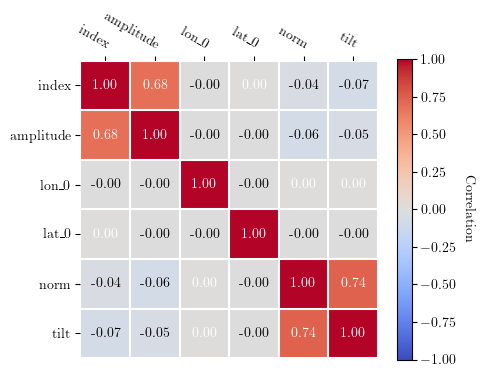

In [10]:
covariance  = covariance_(fit, dataset)
covariance.plot_correlation()


fig = plt.gcf()
fig.savefig("plots/3_corr_matrix_standard.png")

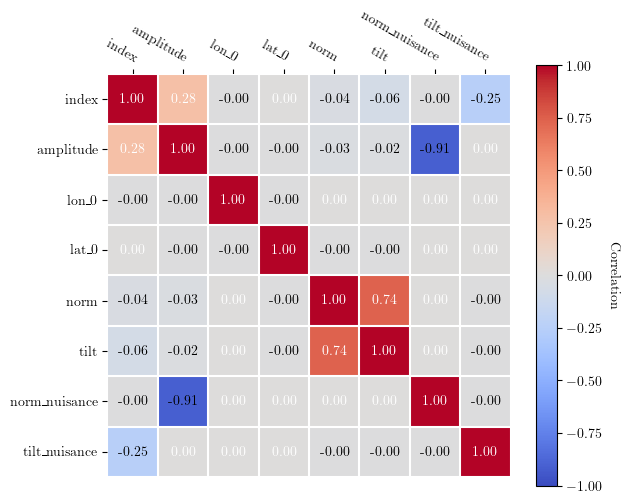

In [11]:
par_names = ['index', 'amplitude', 'lon_0', 'lat_0', 'norm', 'tilt', 'norm_nuisance', 'tilt_nuisance']
parameters = Parameters([dataset_N.models.parameters[name] for name in par_names])
covariance_N_cut  = covariance_(fit_N, dataset_N, parameters )
covariance_N_cut.plot_correlation()


fig = plt.gcf()
plt.tight_layout()
fig.savefig("plots/3_corr_matrix_nuisance.png")

In [12]:
(dataset_N.models.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,is_penalised,link
str12,str13,float64,str14,float64,float64,float64,bool,bool,bool,str1
spectral,index,2.8850e+00,,5.962e-02,nan,nan,False,False,False,
spectral,amplitude,1.8685e-12,cm-2 s-1 TeV-1,2.073e-13,nan,nan,False,True,False,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,False,
spatial,lon_0,8.3630e+01,deg,2.157e-03,nan,nan,False,False,False,
spatial,lat_0,2.2010e+01,deg,2.001e-03,-9.000e+01,9.000e+01,False,False,False,
spectral,norm,1.0000e+00,,1.834e-02,nan,nan,False,True,False,
spectral,tilt,3.5170e-06,,1.555e-02,nan,nan,False,False,False,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,False,
e_reco_model,bias,-1.1736e-40,,1.000e-24,nan,nan,False,False,True,


In [13]:
(dataset.models.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,is_penalised,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,bool,str1
spectral,index,2.8850e+00,,5.778e-02,nan,nan,False,False,False,
spectral,amplitude,1.8686e-12,cm-2 s-1 TeV-1,8.629e-14,nan,nan,False,True,False,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,False,
spatial,lon_0,8.3630e+01,deg,2.157e-03,nan,nan,False,False,False,
spatial,lat_0,2.2010e+01,deg,2.001e-03,-9.000e+01,9.000e+01,False,False,False,
spectral,norm,1.0000e+00,,1.833e-02,nan,nan,False,True,False,
spectral,tilt,5.3753e-07,,1.555e-02,nan,nan,False,False,False,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,False,
